<a href="https://colab.research.google.com/github/Machine-Learning-Tokyo/Reinforcement_Learning/blob/master/session%20%231/maze_walker_rl_code/RL_MazeWalker_Policy_Iteration_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning Tokyo ##
### Introduction to Reinforcement Learning - Maze Walker ###
### Session - 1 ###

We have already seen some basic equations for RL. For ref they are mentioned below

In [1]:
### Area where we download the required files from gdrive ####
### Uncomment the below code to download source library files ####
'''
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/environment.py
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/policyIteration.py
!wget https://raw.githubusercontent.com/Machine-Learning-Tokyo/Reinforcement_Learning/master/session%20%231/maze_walker_rl_code/valueIteration.py
'''

'\n!wget <Environment File>\n!wget <policyiteration File>\n!wget <valueiteration File>\n'

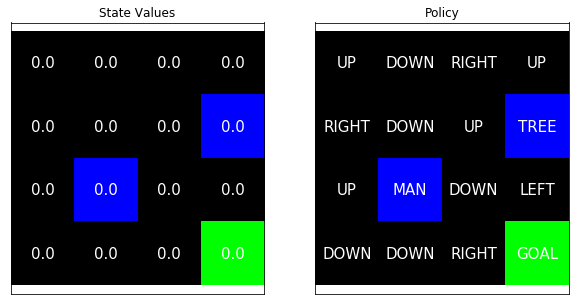

None

In [3]:
from environment import Env
env = Env()
env.draw_board(env.state_value,env.policy)

### POLICY ITERATION METHOD ###

The algorithm for policy iteration works in 2 steps, 

- <b>STEP1 : Policy Evaluation Step</b>
- <b>STEP2 : Policy Improvement Step</b>

<h4 style="color:blue">STEP 1 : Policy Evaluation Step</h4>

In this, based on the current policy (Image on right) we evaluate the current policy using the formula

$V(s) = \sum_a\pi(a|s)(\sum_\hat{s}\sum_r [p(\hat{s}, r | s, a)(r + \gamma*v(\hat{s})])$

Please note
1. Since we have a deterministic policy, therefore $\sum_a\pi(a = LEFT | s = (0,0)) = 1$ as described in the image above.
2. Considering we are taking this action (LEFT) from state (0,0) and the rules provided above, our next state will be (0,0) however, we will be a **-1 reward**

Therefore, through policy evaluation step, 

$V(s = (0,0)) = 1.0 * (1.0 * ( -1 + discount * (0)))$

In [4]:
policy_a_s = 1.0   # Probability of taking action as given in the policy
p_s_r_s_a = 1.0    # Probability of reaching the next state and getting the reward based
reward = -1
discount = 0.6
next_state_value = 0

v_s_0_0 = policy_a_s * (p_s_r_s_a * (reward + discount*next_state_value))
v_s_0_0

-1.0

<h5 style="color:red">Lets run in a little more code specific way</h5>

In [5]:
policy_a_s = 1.0   # Probability of taking action as given in the policy
p_s_r_s_a = 1.0    # Probability of reaching the next state and getting the reward based
next_state, reward = env.get_next_state_and_reward([0,0],"DOWN")
discount = 0.6

policy_a_s * (p_s_r_s_a * (reward + discount*env.state_value[next_state]))

-1.0

<h5 style="color:red">Lets run 1 execution for all the states in the board and see what happens</h5>

In [6]:
from policyIteration import PolicyIteration
policy_iteration = PolicyIteration(discount=0.6,display_mode="graphic")

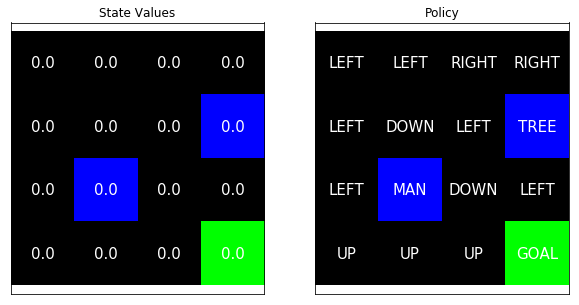

None

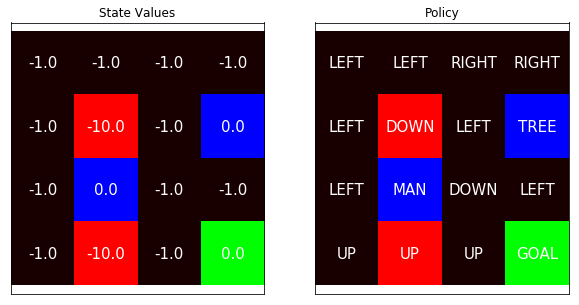

None

Total Iterations executed : 1


In [7]:
policy_iteration.run_policy_evaluation_example(iteration=1)

<h4 style="color:red">Inference</h4>

1. <p style="color:blue">After 1 iterations, we can see that the state values for all the states has been updated (leaving the states where there are obstables</p>
2. <p style="color:blue">As per POLICY ITERATION algorithm we need to execute Policy Evaluation uptill the point, updates to state values stop to occur</p>

<b style="color:red">Lets try to execute 100 iterations for policy evaluation</b>

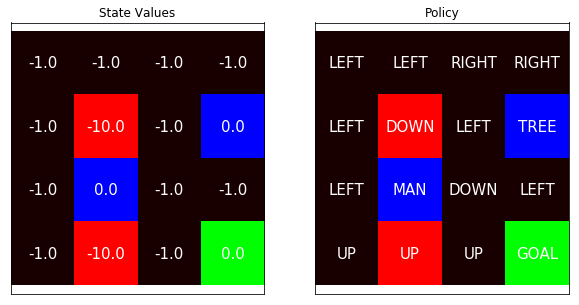

None

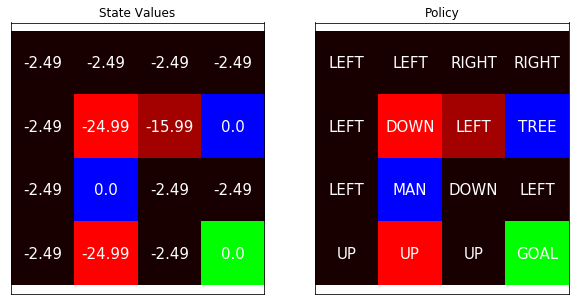

None

Total Iterations executed : 15


In [8]:
policy_iteration.run_policy_evaluation_example(iteration=100)

<h4 style="color:red">Inference</h4>

1. <p style="color:blue"> We see that the total iterations value is < 100, where as we gave 100 in the argument. This is because, in just 10 iterations, the update to state values stopped.</p>
2. <p style="color:blue"> Above is 1 execution of Policy Evaluation Step</p>
3. <p style="color:red"> Remember, we do not update the policy in POLICY EVALUATION step</p>

<h3 style="color:blue">STEP 2 : POLICY IMPROVEMENT</h3>

After reaching a covergence in policy evaluation, we would now improve the policy

Again we refer same equation for `state value function` as

$V(s) = \sum_a\pi(a|s)(\sum_\hat{s}\sum_r [p(\hat{s}, r | s, a)(r + \gamma*v(\hat{s})])$

However, this time we will check which action gives the maximum policy improvement. For example for `state = [0,0]`

- `State = [0,0]`
  - `Action = "LEFT"`
    - $\pi(a = "LEFT" | state = [0,0])$ `= 1.0`
    - $p(\hat{s}, r | s, a)$ = 1.0
    - `reward = -1` 
    - `state value for [0,0] = -2.49`
    - `discount = 0.6`
    - Using above formula this become = 1 * 1 * (-1 + 0.6 * (-2.49)) = -2.494
  - `Action = "RIGHT"`
    - $\pi(a = "RIGHT" | state = [0,0])$ `= 1.0`
    - $p(\hat{s}, r | s, a)$ = 1.0
    - `reward = -1` 
    - `state value for [0,1] = -2.49`
    - `discount = 0.6`
    - Using above formula this become = 1 * 1 * (-1 + 0.6 * (-2.49)) = -2.494
  - `Action = "DOWN"`
    - $\pi(a = "DOWN" | state = [0,0])$ `= 1.0`
    - $p(\hat{s}, r | s, a)$ = 1.0
    - `reward = -1` 
    - `state value for [1,0] = -15.99`
    - `discount = 0.6`
    - Using above formula this become = 1 * 1 * (-1 + 0.6 * (-15.99)) = -10.594
  - `Action = "UP"`
    - $\pi(a = "UP" | state = [0,0])$ `= 1.0`
    - $p(\hat{s}, r | s, a)$ = 1.0
    - `reward = -1` 
    - `state value for [0,0] = -2.49`
    - `discount = 0.6`
    - Using above formula this become = 1 * 1 * (-1 + 0.6 * (-2.49)) = -2.494

**We select the action which results in the maximum value for the state `[0.0]`**

In the above case, we just choose the 1st one, `LEFT`

<b style="color:blue"> Lets see policy improvement in action for 1 iteration </b>

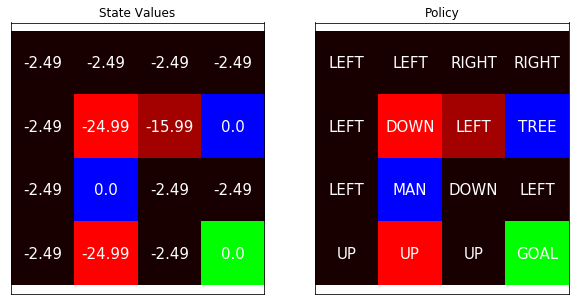

None

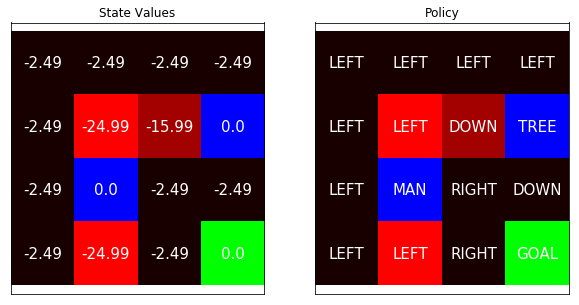

None

In [9]:
policy_iteration.run_policy_improvement_example()

<h2 style="color:blue">Combining Policy Evaluation & Policy Improvement</h2>

<h4 style="color:red">We combine the execution of policy evaluation and policy improvement steps, and keep executing till the time the policy stops to improve.</h4>

In [10]:
policy_iteration = PolicyIteration(discount=0.6,exec_mode="continuous",display_mode="graphic")

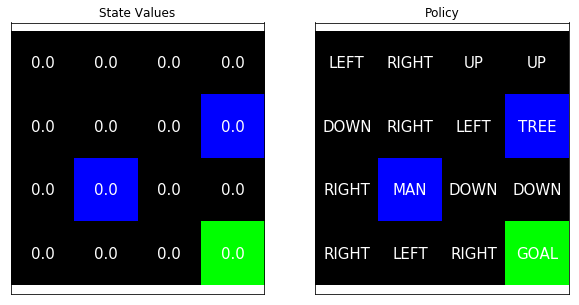

None

Policy Evaluation worked for : 16 iterations. Now the state value and policy are:


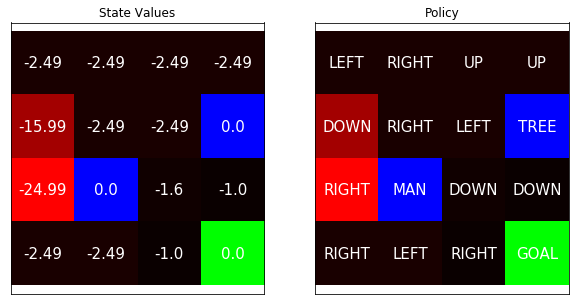

None

Policy Evaluation worked for : 4 iterations. Now the state value and policy are:


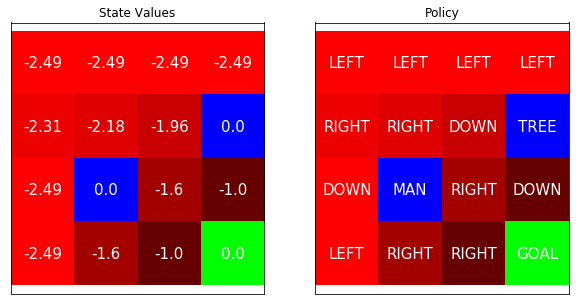

None

Policy Evaluation worked for : 3 iterations. Now the state value and policy are:


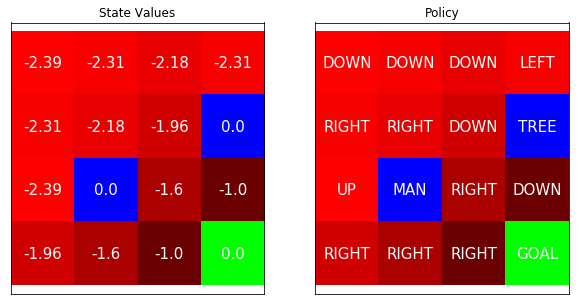

None

Policy Evaluation worked for : 2 iterations. Now the state value and policy are:


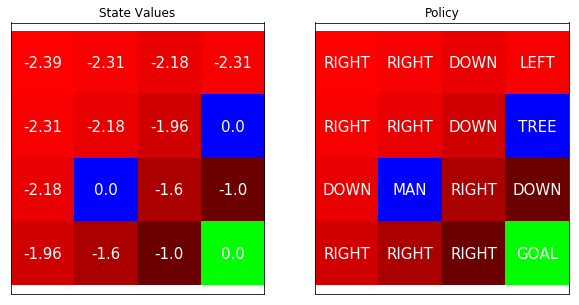

None

--end--


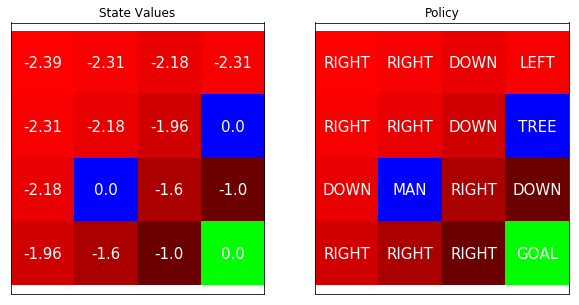

None

In [11]:
policy_iteration.run()

### POLICY ITERATION ALGORITHM ###

```
- Build an arbitary policy
- Associate some random state values to each state
- old policy = arbitary policy
- while old_policy not equal to new_policy
  - for every state
    - update state values using state_value function equation
    - continue till state values converge
  - for every state
    - for every action 
      - update state value based on this action
    - select the action which leads to maximum increase in state value and update the policy for this state.
```